# Data pretrain

In [4]:
!mkdir pt_data
!mkdir pt_data/images
!mkdir pt_data/json

In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 36.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.0
    Uninstalling fsspec-2024.6.0:
      Successfully uninstalled fsspec-2024.6.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
from datasets import load_dataset
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

In [2]:
# import glob
# coco_images = glob.glob("pt_data/images/*/*.jpg")
# coco_images = [path_.split("/")[-1] for path_ in coco_images]
# coco_images = set(coco_images)
# len(coco_images)

In [3]:
json_data = []

In [4]:
for i, row in enumerate(data["train"]):
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    # if i >= 10000:
    #     break

In [5]:
json_data[0]

{'id': '003060223',
 'image': '00306/003060223.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nTrình bày mô tả ngắn gọn về các đặc điểm chính của ảnh.'},
  {'from': 'gpt', 'value': 'gót ren lồng'}]}

In [6]:
# import json
# with open('/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
#     json.dump(json_data, f, ensure_ascii=False, indent=4)

In [6]:
import json

In [7]:
with open("laion.json") as f:
    laion = json.load(f)

In [8]:
import json
with open('/MoE-LLaVA/pt_data/json/pt.json', 'w', encoding='utf-8') as f:
    json.dump(laion+json_data, f, ensure_ascii=False, indent=4)

In [12]:
import glob, shutil

for i in glob.glob('laion_pretrain/*.jpg'):
  shutil.move(i, 'pt_data/images/' + i.split("/")[-1])

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    "sail/Sailor-0.5B",
    torch_dtype="auto",
)
tokenizer = AutoTokenizer.from_pretrained("sail/Sailor-0.5B")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
[2024-06-13 08:28:54,006] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
model.save_pretrained("Qwen1.5-0.5B-sailor")

In [ ]:
tokenizer.save_pretrained("Qwen1.5-0.5B-sailor")

In [1]:
import json

In [2]:
from datasets import load_dataset

In [3]:
data = load_dataset("5CD-AI/Vietnamese-liuhaotian-LLaVA-Pretrain-gg-translated")

In [9]:
import glob
coco_images = glob.glob("pt_data/images/*/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

558128

In [11]:
json_data = []

In [12]:
for row in data["train"]:
    json_data.append({
      "id": row["id"],
      "image": row["image"],
      "conversations": row["conversations_vi"]
    })
    json_data.append({
      "id": row["id"]+"_",
      "image": row["image"],
      "conversations": row["conversations_zh"]
    })

In [13]:
len(json_data)

1116256

In [14]:
json_data[20]

{'id': '002733327',
 'image': '00273/002733327.jpg',
 'conversations': [{'from': 'human',
   'value': 'Mô tả hình ảnh một cách ngắn gọn.\n<image>'},
  {'from': 'gpt', 'value': 'bộ ba chốt con cú'}]}

In [15]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/pt_data/json/pt_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data, f, ensure_ascii=False, indent=4)

# Data finetune

In [3]:
from datasets import load_dataset

In [4]:
vi_llava_conversation = load_dataset("Vi-VLM/Vista", name="vi_llava_conversation", split="train")
vi_sharegpt4v = load_dataset("Vi-VLM/Vista", name="vi_sharegpt4v", split="train")
vi_llava_complex_reasoning = load_dataset("Vi-VLM/Vista", name="vi_llava_complex_reasoning", split="train")
vi_llava_detail_description = load_dataset("Vi-VLM/Vista", name="vi_llava_detail_description", split="train")

In [5]:
vi_llava_conversation = vi_llava_conversation.to_list()
vi_sharegpt4v = vi_sharegpt4v.to_list()
vi_llava_complex_reasoning = vi_llava_complex_reasoning.to_list()
vi_llava_detail_description = vi_llava_detail_description.to_list()

In [9]:
import glob
coco_images = glob.glob("ft_data/images/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

15090

In [12]:
json_data = []
count = 0

In [13]:
for row in vi_sharegpt4v:
    if row["image"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["vi_conversations"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["value"]
            })
        json_data.append({
          "id": count,
          "image": row["image"].split("/")[-1],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

28947

In [16]:
json_data[0]

{'id': 0,
 'image': '000114241.jpg',
 'conversations': [{'from': 'human',
   'value': '<image>\nBạn có thể giải thích thêm về các yếu tố của bức ảnh được cung cấp không?'},
  {'from': 'gpt',
   'value': 'Hình ảnh có một logo ấn tượng cho một công ty có tên "Machine No Guns". Logo được đặt trên một hình vuông màu đen, tạo nên sự tương phản mạnh mẽ thu hút sự chú ý vào các yếu tố bên trong. Chiếm giữ trung tâm của logo là tên công ty, "Machine No Guns", được viết bằng phông chữ không chân, in đậm. Văn bản chủ yếu có màu trắng, nhưng chữ "M" trong "Machine" và chữ "G" trong "Guns" được tô sáng bằng màu cam rực rỡ.\n\nChữ "M" được thay thế sáng tạo bằng hình minh họa màu cam của một khẩu súng máy, thể hiện tên công ty theo cách hấp dẫn về mặt hình ảnh. Trên khẩu súng máy này, có một biểu tượng "không" màu đỏ, nhấn mạnh thêm phần "No Guns" trong tên công ty.\n\nBên dưới văn bản chính, bằng phông chữ màu trắng nhỏ hơn và tinh tế hơn, dòng chữ "Garments and Goods" được ghi, cho biết loại sản 

In [15]:
import glob
coco_images = glob.glob("ft_data/images/train2017/*.jpg")
coco_images = [path_.split("/")[-1] for path_ in coco_images]
coco_images = set(coco_images)
len(coco_images)

118287

In [17]:
for row in vi_llava_conversation:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

135999

In [18]:
json_data[-1]

{'id': 135998,
 'image': 'train2017/000000242558.jpg',
 'conversations': [{'from': 'human',
   'value': 'Biển báo đường bằng gỗ bên cạnh biển báo lớn hơn có nội dung gì?'},
  {'from': 'gpt', 'value': 'Biển báo đường bằng gỗ có nội dung "Crook ST."'},
  {'from': 'human',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh gì?'},
  {'from': 'gpt',
   'value': 'Biển báo lớn hơn bên cạnh biển báo đường bằng gỗ hiển thị hình ảnh của một người đàn ông cơ bắp.'},
  {'from': 'human',
   'value': 'Hai biển báo được liên kết với nhau bằng cách nào?'},
  {'from': 'gpt',
   'value': 'Hai biển báo được liên kết với nhau bằng một sợi xích.'},
  {'from': 'human', 'value': 'Trên biển báo lớn hơn có chữ viết nào không?'},
  {'from': 'gpt', 'value': 'Trên biển báo lớn hơn không có chữ viết nào.'},
  {'from': 'human', 'value': 'Hai dấu hiệu được đặt trên bề mặt nào?'},
  {'from': 'gpt', 'value': 'Hai dấu hiệu được đặt trên cỏ.'},
  {'from': 'human',
   'value': 'Bạn có thể suy

In [19]:
for row in vi_llava_complex_reasoning:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

248649

In [20]:
for row in vi_llava_detail_description:
    if row["file_name"].split("/")[-1] in coco_images:
        new_conversations = []
        for i, line in enumerate(row["conversation"]):
            if i % 2 == 0 :
                from_ = "human"
            else:
                from_ = "gpt"
            new_conversations.append({
                'from' : from_ , 
                'value' : line["content"]
            })
        json_data.append({
          "id": count,
          "image": "train2017/"+row["file_name"],
          "conversations": new_conversations
        })
        count += 1
len(json_data)

359802

In [21]:
json_data_cleaned = []

In [22]:
for row in json_data:
    if len(row["conversations"]) >= 2:
        json_data_cleaned.append(row)

In [23]:
len(json_data_cleaned)

359662

In [24]:
import json
with open('/home/administrator/aiteam/khang/MoE-LLaVA/ft_data/json/ft_moe_llava.json', 'w', encoding='utf-8') as f:
    json.dump(json_data_cleaned, f, ensure_ascii=False, indent=4)

# Test

In [25]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [26]:
import torch
from PIL import Image
from moellava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN
from moellava.conversation import conv_templates, SeparatorStyle
from moellava.model.builder import load_pretrained_model
from moellava.utils import disable_torch_init
from moellava.mm_utils import tokenizer_image_token, get_model_name_from_path, KeywordsStoppingCriteria

[2024-06-10 23:13:48,269] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [27]:
disable_torch_init()

In [28]:
!ls ./checkpoints/llavaqwen-1.5-0.5b-finetune/

added_tokens.json	merges.txt		 tokenizer_config.json
checkpoint-5600		model.safetensors	 trainer_state.json
config.json		runs			 training_args.bin
generation_config.json	special_tokens_map.json  vocab.json


In [29]:
model_path = './checkpoints/llavaqwen-1.5-0.5b-finetune/'  # LanguageBind/MoE-LLaVA-Qwen-1.8B-4e or LanguageBind/MoE-LLaVA-StableLM-1.6B-4e
device = 'cuda'
load_4bit, load_8bit = False, False  # FIXME: Deepspeed support 4bit or 8bit?
model_name = get_model_name_from_path(model_path)
tokenizer, model, processor, context_len = load_pretrained_model(model_path, None, model_name, load_8bit, load_4bit, device=device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/administrator/.virtualenvs/env/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at ./checkpoints/llavaqwen-1.5-0.5b-finetune/ were not used when initializing LlavaQwen1_5ForCausalLM: ['model.image_tower.image_tower.vision_model.embeddings.patch_embedding.bias', 'model.image_tower.image_tower.vision_model.embeddings.patch_embedding.weight', 'model.image_tower.image_tower.vision_model.embeddings.position_embedding.weight', 'model.image_tower.image_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.image_tower.image_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.image_tower.image_towe

In [30]:
import glob
import matplotlib.pyplot as plt

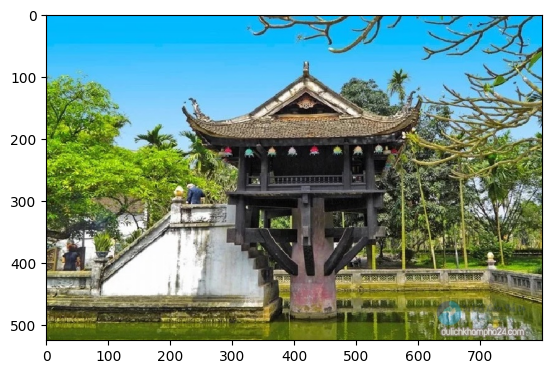

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Hình ảnh ghi lại cảnh tượng thanh bình tại một công trình kiến trúc cổ kính, được xây dựng từ đá và kim loại. Chiếm trọn khung hình là một tháp đồng hồ lớn, mặt đồng hồ màu trắng nổi bật trên nền đá xám. Tháp đồng hồ được trang trí bằng những chi tiết trang trí công phu, tạo thêm nét quyến rũ mộc mạc cho khung cảnh.

Bên dưới tháp đồng hồ, một hồ nước tĩnh lặng trải dài, mặt nước phẳng lặng phản chiếu bầu trời xanh trong vắt. Hồ nước được bao qu


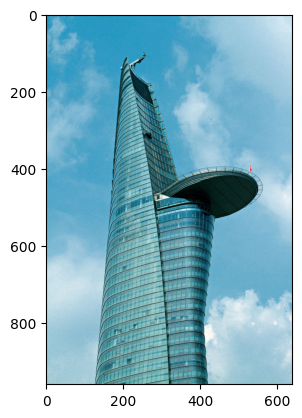

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Hình ảnh ghi lại cảnh tượng ngoạn mục của một tòa nhà cao chót vót, được sơn màu xanh lá cây rực rỡ. Tòa nhà, với mái vòm tròn, được bao quanh bởi những hàng cây xanh tươi, tạo nên sự tương phản rõ nét với màu xanh của tòa nhà. Tòa nhà được trang trí bằng một chiếc đồng hồ lớn, mặt đồng hồ màu trắng nổi bật trên nền màu xanh lá cây. Chiếc đồng hồ được đặt ở vị trí trung tâm của tòa nhà, thu hút sự chú ý của người xem


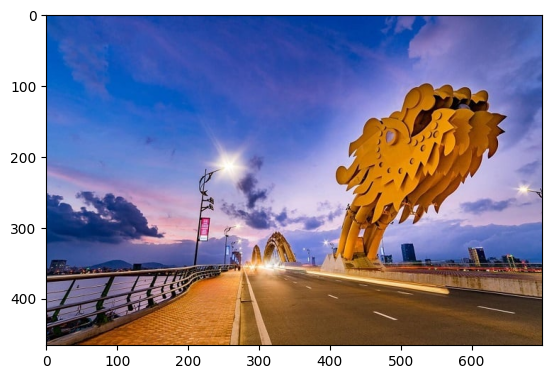

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Hình ảnh ghi lại cảnh tượng ngoạn mục trên một con đường lát đá cuội, được bao quanh bởi những hàng cây xanh tươi. Con đường được trang trí bằng một bức tượng hình con bò màu vàng, được đặt ở giữa, tạo nên điểm nhấn nổi bật trên nền trời xanh trong vắt. Bức tượng được đặt trên một cột kim loại, được trang trí bằng một chiếc đồng hồ lớn, tạo thêm nét quyến rũ mộc mạc cho khung cảnh.

Bên phải bức tượng, một tòa nhà cao tầng, được sơn màu trắng,


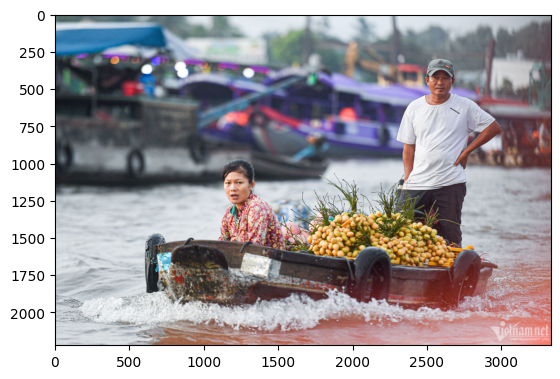

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Trong hình ảnh, một người đàn ông và một người phụ nữ đang tận hưởng một ngày trên mặt nước. Người đàn ông mặc áo sơ mi trắng và quần đen, đang ngồi trên một chiếc thuyền màu xanh lam. Chiếc thuyền được trang bị một mái chèo màu xanh lam và một mái chèo màu xanh lá cây. Người phụ nữ mặc áo sơ mi xanh và quần đen, đang ngồi trên một chiếc thuyền màu trắng. Chiếc thuyền cũng được trang bị một mái chèo màu xanh lam và một mái chèo màu xanh lá cây. Cả hai


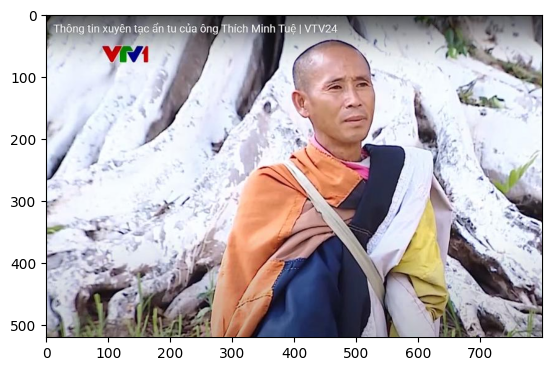

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Trong hình, một người đàn ông đang đứng trên một con đường đất, mặc một bộ vest đen và đội một chiếc mũ đen. Anh ta đang cầm một chiếc ô màu xanh lá cây, có lẽ để che nắng hoặc mưa. Người đàn ông đang nhìn về phía bên phải của hình ảnh, có thể là đang nhìn vào một thứ gì đó ở phía xa. Phía sau anh ta là một khu rừng rậm rạp, với những cây xanh tươi tốt và những bụi cây rải rác. Bầu trời phía trên trong xanh, không có mây, cho thấy một ngày nắng đẹp


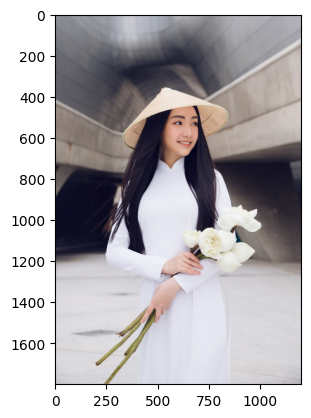

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:151643 for open-end generation.


ASSISTANT: Hãy mô tả bức ảnh một cách chi tiết ?
Trong hình ảnh, một người phụ nữ là nhân vật trung tâm, đứng trên một con đường lát đá cuội. Cô ấy mặc một chiếc váy trắng dài đến đầu gối, tạo nên sự tương phản nổi bật với màu xanh của cây cối xung quanh. Chiếc váy của cô ấy được trang trí bằng những bông hoa màu trắng, tạo thêm nét thanh lịch cho trang phục của cô ấy.

Người phụ nữ đang cầm một bó hoa màu trắng, mỗi bông có một bông hoa riêng. Những bông hoa này được sắp xếp


In [33]:
for image_path in glob.glob("test_images/*"):
    inp = 'Hãy mô tả bức ảnh một cách chi tiết ?'
    image = image_path
    image_processor = processor['image']
    conv_mode = "qwen"  # qwen or stablelm
    conv = conv_templates[conv_mode].copy()
    roles = conv.roles
    image_tensor = image_processor.preprocess(Image.open(image).convert('RGB'), return_tensors='pt')['pixel_values'].to(model.device, dtype=torch.float16)
    plt.imshow(Image.open(image).convert('RGB'))
    plt.show()
    print(f"{roles[1]}: {inp}")
    inp = DEFAULT_IMAGE_TOKEN + '\n' + inp
    conv.append_message(conv.roles[0], inp)
    conv.append_message(conv.roles[1], None)
    prompt = conv.get_prompt()
    input_ids = tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors='pt').unsqueeze(0).cuda()
    stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
    keywords = [stop_str]
    stopping_criteria = KeywordsStoppingCriteria(keywords, tokenizer, input_ids)
    with torch.inference_mode():
        output_ids = model.generate(
        input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=0.1,
        max_new_tokens=128,
        num_beams=4,
        use_cache=True,
        stopping_criteria=[stopping_criteria])

    outputs = tokenizer.decode(output_ids[0, input_ids.shape[1]:], skip_special_tokens=True).strip()
    print(outputs)
    print("="*100)